In [1]:
import pandas as pd
import glob
import os

# Specify the path to your CSV files
path = "C:/Users/pooya/Documents/Python/Marketing/browse_purchase/initial_files/"  
all_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to hold the dataframes
dataframes = []

# Iterate through each file and read it into a dataframe
for file in all_files:
    df = pd.read_csv(file, dtype={'deviceCategory': 'str'},low_memory=False)
    dataframes.append(df)
# Concatenate all dataframes
merged_df = pd.concat(dataframes, ignore_index=True)

# Write the merged dataframe to a new CSV file
output_file = "merged_output2.csv"
merged_df.to_csv(output_file, index=False)

print(f"Successfully merged {len(all_files)} files into {output_file}")



Successfully merged 9 files into merged_output2.csv


In [2]:
import pandas as pd

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Your code here
merged_df.head()

,date,customerId,country,city,visitStartTime,browser,deviceCategory,visit_from_app,utm_medium,channelGrouping,pageviews,timeOnSite,bounces,interaction_hits,products_impressions,store_locator,add_to_wishlist,contact_customercare,set_product_alert,products_added_to_cart,products_removed_from_cart,products_refunded,visit_with_add_to_cart,visit_with_remove_from_cart,visit_with_purchase,visit_with_checkout,visit_with_productDetailView,visit_with_productListView,product_ids_purchased,product_quantity_purchased,tot_revenue
0,2020-03-29,oY7j71UviueL2fZ2dDzhgw==,Spain,Almeria,1585449203,Opera,desktop,False,(none),Direct,9.0,68.0,NaN,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2020-03-29,dmAI35xDBk2eKlvN2eO/fA==,France,Merignac,1585494956,Opera,desktop,False,referral,Social,1.0,NaN,1.0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-03-29,0DGLiPbuyyJ3sEphwIc1MA==,Spain,Valencia,1585492448,Opera,desktop,False,referral,Social,5.0,53.0,NaN,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN
3,2020-03-29,I0jeXoV4pyvk/J5X0qNk8Q==,Italy,Palermo,1585477780,Opera,desktop,False,nl,(Other),3.0,25.0,NaN,0,8,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,NaN,NaN
4,2020-03-29,sT3BdpItZ4Hl7IxR9VGiQg==,Ukraine,Kamianske,1585481024,YaBrowser,mobile,False,email,(Other),5.0,62.0,NaN,1,48,0,0,0,0,0,0,0,0,0,0,0,1,1,NaN,NaN,NaN


In [3]:
import pandas as pd
from datetime import datetime

# Load the data into a DataFrame
df = pd.read_csv('merged_output2.csv',low_memory=False)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define the fixed date for recency calculation
fixed_date = datetime(2022, 3, 18)

# Group by 'customerId' and calculate the required metrics
result = df.groupby('customerId').agg(
    minDate=('date', 'min'),
    maxDate=('date', 'max'),
    country=('country', lambda x: x.mode()[0] if not x.mode().empty else None),
    city=('city', lambda x: x.mode()[0] if not x.mode().empty else None),
    browser=('browser', lambda x: x.mode()[0] if not x.mode().empty else None),
    device=('deviceCategory', lambda x: x.mode()[0] if not x.mode().empty else None),
    app=('visit_from_app', lambda x: x.mode()[0] if not x.mode().empty else None),
    utm=('utm_medium', lambda x: x.mode()[0] if not x.mode().empty else None),
    channel=('channelGrouping', lambda x: x.mode()[0] if not x.mode().empty else None),
    pgview=('pageviews', 'mean'),
    mintimeonsite=('timeOnSite', 'min'),
    maxtimeonsite=('timeOnSite', 'max'),
    bounces=('bounces', 'max'),
    hits=('interaction_hits', 'mean'),
    impr=('products_impressions', 'mean'),
    wish=('add_to_wishlist', 'max'),
    care=('contact_customercare', 'max'),
    alert=('set_product_alert', 'max'),
    addcart=('products_added_to_cart', 'max'),
    rmcart=('products_removed_from_cart', 'max'),
    refund=('products_refunded', 'max'),
    vadd=('visit_with_add_to_cart', 'max'),
    vrm=('visit_with_remove_from_cart', 'max'),
    vp=('visit_with_purchase', 'max'),
    vc=('visit_with_checkout', 'max'),
    vdv=('visit_with_productDetailView', 'max'),
    vlv=('visit_with_productListView', 'max'),
    quan=('product_quantity_purchased', 'sum'),
    rev=('tot_revenue', 'mean'),
    freq=('date', 'count')
).reset_index()

# Calculate recency and churn
result['rec'] = (fixed_date - result['maxDate']).dt.days
result['target_churn'] = result['rec'].apply(lambda x: 0 if x < 60 else 1)

# Display the resulting DataFrame
print(result)


                       customerId    minDate    maxDate         country  \
0        +++GRcoGtSSd6mS7WsDXDQ== 2020-12-13 2020-12-13           Italy   
1        +++SJgx/2IJ+dXq7vF8COg== 2021-11-28 2021-11-28           Spain   
2        +++aKiAiXhTfaqCLC/kyWA== 2021-03-16 2021-03-16          France   
3        +++rPSJqJxUybd5VQBJlRw== 2020-05-28 2020-05-29  United Kingdom   
4        +++tkVCLHtuRHFq/0FGt9A== 2020-11-30 2020-11-30           Italy   
...                           ...        ...        ...             ...   
1530299  zzzMOPFyWESW0AbDyGzLOg== 2020-07-09 2020-07-09           Spain   
1530300  zzzj3hW4oytUbaZbp6hqiw== 2021-03-05 2021-03-05           Spain   
1530301  zzzkp+wC5LHXLSmDg2F9Fg== 2020-11-21 2021-07-27        Portugal   
1530302  zzzo4dFFeMwz8hteZGyuUA== 2021-05-24 2021-05-24  United Kingdom   
1530303  zzzw9F58G18s/Cs1j0SgzA== 2020-12-06 2020-12-06          France   

              city          browser   device    app      utm  \
0            Padua           Chrome

In [4]:
result.to_csv('results.csv', index=False)

modified

In [5]:
df=result.copy() # Copying the dataframe to a new variable to avoid any changes to the original dataframe
pd.set_option('display.max_columns', None)
columns_to_extract = ["country", "city", "browser", "device", "app", "utm", "channel"]

def extract_value(x):
    if isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict):
        return x[0].get('value')
    return None

for column in columns_to_extract:
    df[column] = df[column].apply(extract_value)

df_pre=df.copy() # Again

df_pre['maxDate'] = pd.to_datetime(df_pre['maxDate'])
df_pre['minDate'] = pd.to_datetime(df_pre['minDate'])
df_pre['yearstart'] = df_pre['minDate'].dt.year
df_pre['monthstart'] = df_pre['minDate'].dt.month
df_pre['yearend'] = df_pre['maxDate'].dt.year
df_pre['monthend'] = df_pre['maxDate'].dt.month

# Group by start year and month, and calculate count size to find the number of people who joined
grouped_initial_values= df_pre.groupby(['yearstart', 'monthstart']).size().reset_index(name='size')

# Creating a Dataframe based on First visit date, Last visit date. (kind of creating some checkpoints for each customerId)
results_df = pd.DataFrame(columns=['Label', 'MonthStart', 'YearStart', 'MonthEnd', 'YearEnd'])
for year in range(2020, 2023):
    for month_start in range(1, 13):
        for y in range(2020, 2023):
            for month_end in range(1, 13):
                df_g = df_pre[(df_pre['monthend'] == month_end) & (df_pre['monthstart'] == month_start) & (df_pre['yearstart'] == year) & (df_pre['yearend'] == y)]
                grouped_max = df_g.groupby('monthstart')
                resultssss = grouped_max.size().reset_index(name='count')
                label = f"Results for {month_start}/{year} to {month_end}/{y}"
                resultssss['Label'] = label
                resultssss['MonthStart'] = month_start
                resultssss['YearStart'] = year
                resultssss['MonthEnd'] = month_end
                resultssss['YearEnd'] = y
                results_df = pd.concat([results_df, resultssss], ignore_index=True)
# View Dataframe
results_df

,Label,MonthStart,YearStart,MonthEnd,YearEnd,monthstart,count
0,Results for 2/2020 to 2/2020,2,2020,2,2020,2.0,5557.0
1,Results for 2/2020 to 3/2020,2,2020,3,2020,2.0,2356.0
2,Results for 2/2020 to 4/2020,2,2020,4,2020,2.0,1149.0
3,Results for 2/2020 to 5/2020,2,2020,5,2020,2.0,1312.0
4,Results for 2/2020 to 6/2020,2,2020,6,2020,2.0,810.0
...,...,...,...,...,...,...,...
346,Results for 1/2022 to 2/2022,1,2022,2,2022,1.0,9202.0
347,Results for 1/2022 to 3/2022,1,2022,3,2022,1.0,3939.0
348,Results for 2/2022 to 2/2022,2,2022,2,2022,2.0,34759.0
349,Results for 2/2022 to 3/2022,2,2022,3,2022,2.0,6377.0


In [6]:
import numpy as np
# Again, create a copy of the DataFrame without the index column
results_df_copy = results_df.copy().reset_index(drop=True)
# Create a new column for the y-axis labels by combining startyear and startmonth in yyyy-mm format
results_df_copy['Y-Axis'] = results_df_copy['YearStart'].astype(str) + '-' + results_df_copy['MonthStart'].astype(str).str.zfill(2)
# Create a new column for the x-axis labels by combining endyear and endmonth in yyyy-mm format
results_df_copy['X-Axis'] = results_df_copy['YearEnd'].astype(str) + '-' + results_df_copy['MonthEnd'].astype(str).str.zfill(2)
# Create a pivot table with Y-Axis as rows, X-Axis as columns, and count as values
heatmap_data = results_df_copy.pivot_table(index='X-Axis', columns='Y-Axis', values='count', aggfunc='sum')
# Some modification about dataframe and matrix
heatmap_data_np=np.array(heatmap_data)

x=np.zeros((26,26))
y = np.zeros((26, 26))
for i in range(26):
    x[i,:]=heatmap_data_np[:,i]

separated_rows = []
z=[]
for i in range(26):
    row_values = x[i, i:].tolist()
    separated_rows.append(row_values)
    z=separated_rows[i]
    z.extend([0] * (26 - len(z)))
    y[i,0:]=z
y = pd.DataFrame(y)
list_initial_values = list(grouped_initial_values["size"])
try:
    y.insert(0, 'Initial_Values', list_initial_values)
except:
    pass
# Calculate the percentage difference for each row
df_y_perc = y.copy()

for i in range(1, len(df_y_perc.columns)): #1 not 0
    df_y_perc.iloc[:, i] = (df_y_perc.iloc[:, i-1] - df_y_perc.iloc[:, i])

df_y_perc=np.array(df_y_perc)
df_y_perc[1:,:-1]=df_y_perc[1:,:-1]+df_y_perc[:-1,1:]
df_y_perc=pd.DataFrame(df_y_perc)
df_y_perc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,34229.0,28672.0,26316.0,25167.0,23855.0,23045.0,22338.0,21539.0,20928.0,20336.0,19190.0,18229.0,17199.0,16503.0,15731.0,15155.0,14449.0,13956.0,13160.0,12303.0,11677.0,11033.0,9207.0,7840.0,5804.0,3046.0,0.0
1,102468.0,77149.0,69090.0,63314.0,60538.0,58330.0,55996.0,54236.0,52569.0,48929.0,46072.0,43120.0,41000.0,38591.0,36622.0,34617.0,33346.0,31124.0,28876.0,27130.0,25454.0,20607.0,17143.0,11932.0,6098.0,0.0,0.0
2,169823.0,111387.0,93545.0,88072.0,84394.0,80755.0,77997.0,75339.0,68852.0,64116.0,59431.0,55652.0,51408.0,47796.0,44680.0,42762.0,39395.0,36083.0,33573.0,31170.0,24350.0,19556.0,12532.0,6061.0,0.0,0.0,0.0
3,171004.0,106684.0,97375.0,92668.0,88419.0,85192.0,82136.0,74486.0,68966.0,63766.0,59519.0,54754.0,50638.0,47109.0,44869.0,41099.0,37416.0,34719.0,32083.0,24673.0,19409.0,12153.0,5614.0,0.0,0.0,0.0,0.0
4,116490.0,81162.0,74747.0,70655.0,67683.0,64972.0,59069.0,54575.0,50455.0,47271.0,43904.0,41024.0,38151.0,36214.0,33051.0,30047.0,27854.0,25659.0,19592.0,15463.0,9736.0,4456.0,0.0,0.0,0.0,0.0,0.0
5,88679.0,60397.0,54332.0,51402.0,49073.0,44762.0,41328.0,38140.0,35722.0,33395.0,31515.0,29404.0,27844.0,25242.0,22819.0,21104.0,19441.0,14934.0,11959.0,7507.0,3407.0,0.0,0.0,0.0,0.0,0.0,0.0
6,81392.0,52927.0,48110.0,45557.0,41210.0,38008.0,34890.0,32630.0,30490.0,28744.0,26941.0,25557.0,23072.0,20618.0,18965.0,17554.0,13486.0,10787.0,6761.0,3035.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,77115.0,49133.0,44502.0,39330.0,35849.0,32579.0,30274.0,28132.0,26447.0,24701.0,23419.0,21209.0,18937.0,17285.0,15918.0,12073.0,9620.0,6068.0,2773.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,74776.0,49605.0,40990.0,36274.0,32677.0,30139.0,27732.0,25903.0,24028.0,22720.0,20716.0,18751.0,17125.0,15630.0,11667.0,9168.0,5760.0,2656.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,167828.0,84908.0,67297.0,59682.0,54734.0,50099.0,46478.0,43036.0,40924.0,37478.0,34242.0,31825.0,29480.0,20449.0,15450.0,9506.0,4274.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:



# Calculate the percentage change for each row
churn_final = df_y_perc.copy()
churn_final["Initial_Values"]=100

churn_final = churn_final[['Initial_Values'] + list(churn_final.columns[:-1])]

for i in range(1, len(churn_final.columns)-1):
    churn_final.iloc[:, i] = (df_y_perc.iloc[:, i] / df_y_perc.iloc[:, i-1]) * 100

# Also some modification in labels
new_column_names = {
    0: '1M',
    1: '2M',
    2: '3M',
    3: '4M',
    4: '5M',
    5: '6M',
    6: '7M',
    7: '8M',
    8: '9M',
    9: '10M',
    10: '11M',
    11: '1Y',
    12: '1M',
    13: '2M',
    14: '3M',
    15: '4M',
    16: '5M',
    17: '6M',
    18: '7M',
    19: '8M',
    20: '9M',
    21: '10M',
    22: '11M',
    23: '2Y',
    24: '1M',
    25: '2M'
}
date_dictionary = {
    0: '02-2020',
    1: '03-2020',
    2: '04-2020',
    3: '05-2020',
    4: '06-2020',
    5: '07-2020',
    6: '08-2020',
    7: '09-2020',
    8: '10-2020',
    9: '11-2020',
    10: '12-2020',
    11: '01-2021',
    12: '02-2021',
    13: '03-2021',
    14: '04-2021',
    15: '05-2021',
    16: '06-2021',
    17: '07-2021',
    18: '08-2021',
    19: '09-2021',
    20: '10-2021',
    21: '11-2021',
    22: '12-2021',
    23: '01-2022',
    24: '02-2022',
    25: '03-2022'
}

# Rename the columns using the dictionary
churn_final = churn_final.rename(columns=new_column_names)
churn_final = churn_final.rename(index=date_dictionary)
churn_final = churn_final.fillna(0)

# FINALLY we created a table of churn rates
churn_final

,Initial_Values,1M,2M,3M,4M,5M,6M,7M,8M,9M,10M,11M,1Y,1M,2M,3M,4M,5M,6M,7M,8M,9M,10M,11M,2Y,1M,2M,26
02-2020,100,83.765228,91.782924,95.633835,94.786824,96.604485,96.932089,96.423135,97.163285,97.171254,94.364673,94.992183,94.349663,95.953253,95.322063,96.338440,95.341471,96.587999,94.296360,93.487842,94.911810,94.484885,83.449651,85.152601,74.030612,52.481048,0.0,0.0
03-2020,100,75.290823,89.553980,91.639890,95.615504,96.352704,95.998628,96.856918,96.926396,93.075767,94.160927,93.592638,95.083488,94.124390,94.897774,94.525149,96.328394,93.336532,92.777278,93.953456,93.822337,80.957806,83.190178,69.602753,51.106269,0.000000,0.0,0.0
04-2020,100,65.590056,83.981973,94.149340,95.823871,95.688082,96.584732,96.592177,91.389586,93.121478,92.692932,93.641366,92.374039,92.973856,93.480626,95.707252,92.126187,91.592842,93.043816,92.842463,78.119987,80.312115,64.082634,48.364188,0.000000,0.000000,0.0,0.0
05-2020,100,62.386845,91.274230,95.166110,95.414814,96.350332,96.412809,90.686179,92.589211,92.460053,93.339711,91.994153,92.482741,93.030925,95.245070,91.597762,91.038711,92.791854,92.407615,76.903656,78.664937,62.615282,46.194355,0.000000,0.000000,0.000000,0.0,0.0
06-2020,100,69.672933,92.096055,94.525533,95.793645,95.994563,90.914548,92.391948,92.450756,93.689426,92.877240,93.440233,92.996782,94.922807,91.265809,90.911016,92.701434,92.119624,76.355275,78.925071,62.963202,45.768283,0.000000,0.000000,0.000000,0.000000,0.0,0.0
07-2020,100,68.107444,89.958111,94.607230,95.469048,91.215128,92.328314,92.286101,93.660199,93.485807,94.370415,93.301602,94.694599,90.655078,90.400919,92.484333,92.119977,76.817036,80.079014,62.772807,45.384308,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
08-2020,100,65.027275,90.898785,94.693411,90.458107,92.230041,91.796464,93.522499,93.441618,94.273532,93.727387,94.862848,90.276637,89.363731,91.982734,92.559979,76.825795,79.986653,62.677297,44.889809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
09-2020,100,63.713934,90.574563,88.378050,91.149250,90.878407,92.924890,92.924622,94.010380,93.398117,94.809927,90.563218,89.287567,91.276337,92.091409,75.844955,79.681935,63.076923,45.698748,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
10-2020,100,66.338130,82.632799,88.494755,90.083807,92.233069,92.013670,93.404731,92.761456,94.556351,91.179577,90.514578,91.328462,91.270073,74.644914,78.580612,62.827225,46.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
11-2020,100,50.592273,79.258727,88.684488,91.709393,91.531772,92.772311,92.594346,95.092481,91.579513,91.365601,92.941417,92.631579,69.365672,75.553817,61.527508,44.961077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


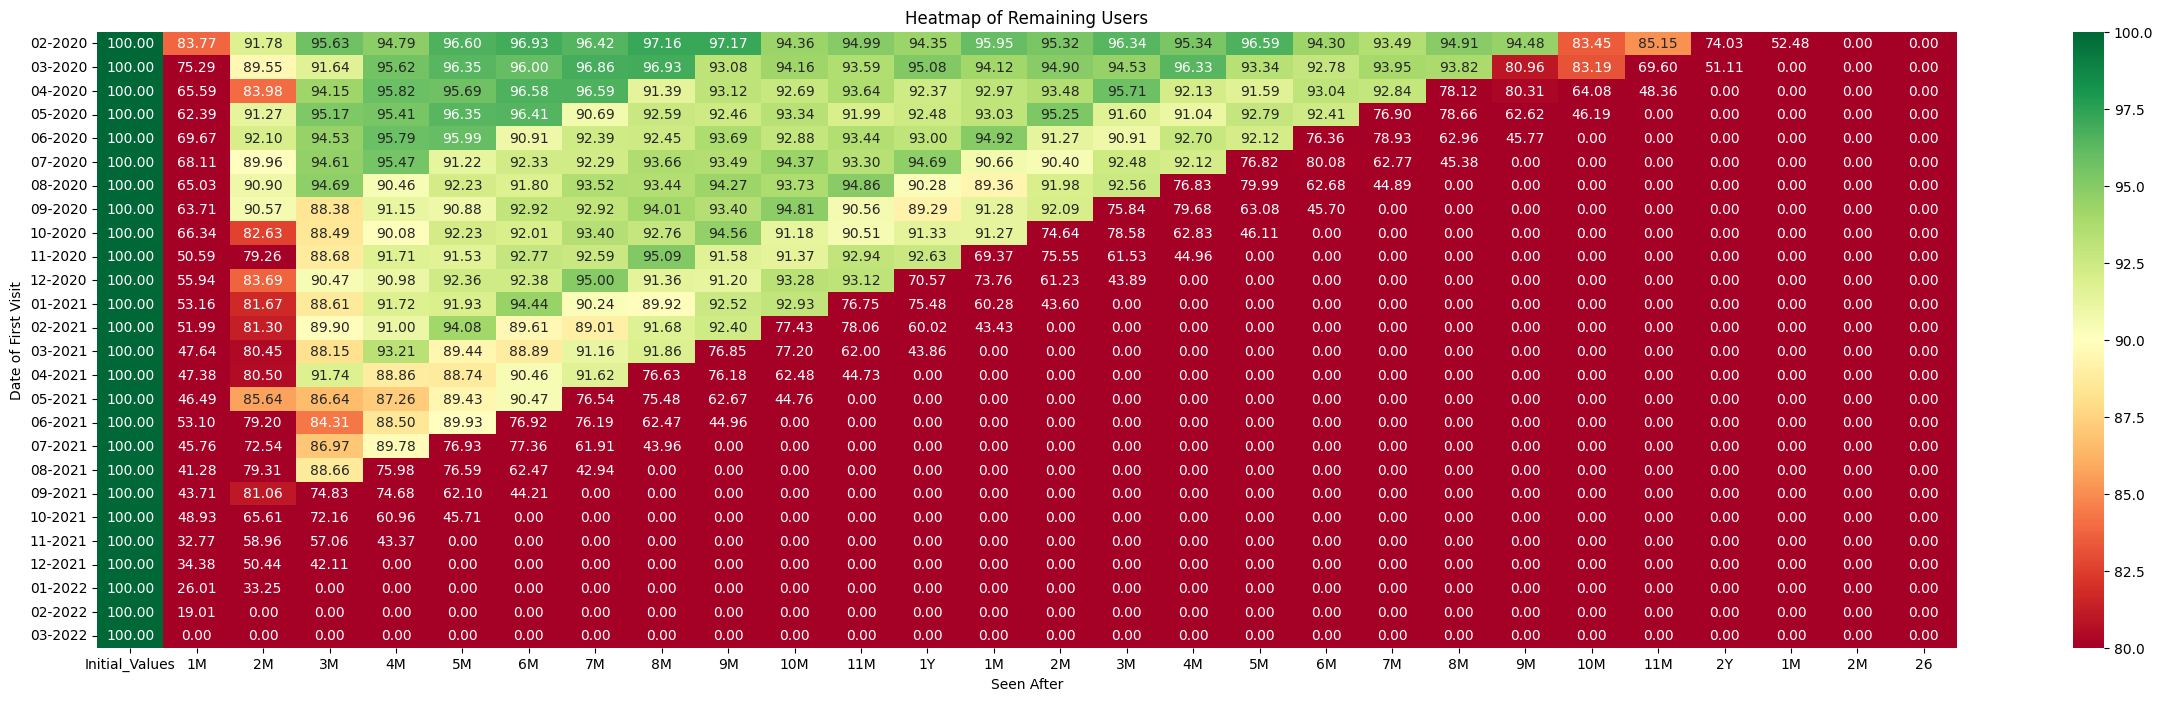

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Depicting the heatmap
plt.figure(figsize=(30, 8))  # Wide tables are more beautiful
sns.heatmap(churn_final, annot=True, fmt=".2f", cmap="RdYlGn", vmin=80, vmax=100)
plt.title("Heatmap of Remaining Users")
plt.xlabel("Seen After")
plt.ylabel("Date of First Visit")
plt.show()

principal component analysis for finding the key influencer factors

processing the data

In [9]:

import pandas as pd

df_ml=df_pre.copy()
# Drop redundant and autocorrelated features (this should be done through carefull examination complex methods. but based on general educated knowledge we can drop some)
df_ml.sort_values("minDate")

#df_ml=df_ml.dropna()
# Some preprocessing
try:
    df_ml=df_ml.drop(["customerId","minDate","maxDate","city","browser","utm","mintimeonsite_1"],axis=1)
except:
    pass
column_names=list(df_ml.columns)
target=column_names[-1]
features=column_names[:-1]
# Some lable encoding
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['channel', 'app', 'device', 'country']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df_ml[column] = label_encoder.fit_transform(df_ml[column])

In [10]:
#df_ml.head()
#df_ml.describe()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530304 entries, 0 to 1530303
Data columns (total 37 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   customerId     1530304 non-null  object        
 1   minDate        1530304 non-null  datetime64[ns]
 2   maxDate        1530304 non-null  datetime64[ns]
 3   country        1530304 non-null  int32         
 4   city           0 non-null        object        
 5   browser        0 non-null        object        
 6   device         1530304 non-null  int32         
 7   app            1530304 non-null  int32         
 8   utm            0 non-null        object        
 9   channel        1530304 non-null  int32         
 10  pgview         1519993 non-null  float64       
 11  mintimeonsite  1504917 non-null  float64       
 12  maxtimeonsite  1504917 non-null  float64       
 13  bounces        457757 non-null   float64       
 14  hits           1530304 non-null  f

In [11]:
#df_m1 = result.copy() #keep this part as a comment it was for a previous fix

In [12]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Loading Data
# Load your data into df_ml. For example:
# df_ml = pd.read_csv('your_data_file.csv')

# For the purpose of this example, I'll create a sample DataFrame
# Replace this with your actual data loading code
#data = {
   # 'customerId': [1, 2, 3, 4, 5],
  #  'feature1': [10, 20, 30, 40, 50],
 #   'feature2': [5, 4, 3, 2, 1],
#    'feature3': [100, 200, 300, 400, 500]
#}
df_ml = pd.DataFrame(df_pre.copy()) # Copying the dataframe to a new variable to avoid any changes to the original dataframe

# Step 3: Data Preparation
# Drop the 'customerId' column if it exists
if 'customerId' in df_ml.columns:
    df_ml = df_ml.drop(columns=['customerId'])

# Step 4: Standardizing the Features
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(df_ml)

# Step 5: Applying PCA
pca = PCA()
df_ml_pca = pca.fit_transform(df_ml_scaled)

# Extract the principal components and calculate their absolute sum
principal_components = pca.components_
abs_sum_components = np.abs(principal_components).sum(axis=0)

# Sort features by importance
important_feature_indices = np.argsort(abs_sum_components)[::-1]
important_features = df_ml.columns[important_feature_indices]

# Step 6: Visualizing the Results
plt.figure(figsize=(12, 8))

# Use a different color (e.g., "turquoise") for the bars
plt.bar(range(len(important_features)), abs_sum_components[important_feature_indices], color='turquoise', align='center')

# Customize the plot
plt.xticks(range(len(important_features)), important_features, rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Important Features based on PCA', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [14]:
'''''
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Loading Data
# Load your data into df_ml. For example:
# df_ml = pd.read_csv('your_data_file.csv')

# For the purpose of this example, I'll create a sample DataFrame
# Replace this with your actual data loading code

df_ml = pd.DataFrame(df_pre.copy()) # Copying the dataframe to a new variable to avoid any changes to the original dataframe    
df_ml.dropna()
# Step 3: Data Preparation
# Drop the 'customerId' column if it exists
if 'customerId' in df_ml.columns:
    df_ml = df_ml.drop(columns=['customerId'])

# Identify datetime columns
datetime_columns = df_ml.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical format (Unix timestamp)
for col in datetime_columns:
    df_ml[col] = df_ml[col].apply(lambda x: x.timestamp())

# Step 4: Standardizing the Features
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(df_ml)

# Step 5: Applying PCA
pca = PCA()
df_ml_pca = pca.fit_transform(df_ml_scaled)

# Extract the principal components and calculate their absolute sum
principal_components = pca.components_
abs_sum_components = np.abs(principal_components).sum(axis=0)

# Sort features by importance
important_feature_indices = np.argsort(abs_sum_components)[::-1]
important_features = df_ml.columns[important_feature_indices]

# Step 6: Visualizing the Results
plt.figure(figsize=(12, 8))

# Use a different color (e.g., "turquoise") for the bars
plt.bar(range(len(important_features)), abs_sum_components[important_feature_indices], color='turquoise', align='center')

# Customize the plot
plt.xticks(range(len(important_features)), important_features, rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Important Features based on PCA', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()
'''

'\'\'\n# Step 1: Importing Libraries\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\n# Step 2: Loading Data\n# Load your data into df_ml. For example:\n# df_ml = pd.read_csv(\'your_data_file.csv\')\n\n# For the purpose of this example, I\'ll create a sample DataFrame\n# Replace this with your actual data loading code\n\ndf_ml = pd.DataFrame(df_pre.copy()) # Copying the dataframe to a new variable to avoid any changes to the original dataframe    \ndf_ml.dropna()\n# Step 3: Data Preparation\n# Drop the \'customerId\' column if it exists\nif \'customerId\' in df_ml.columns:\n    df_ml = df_ml.drop(columns=[\'customerId\'])\n\n# Identify datetime columns\ndatetime_columns = df_ml.select_dtypes(include=[\'datetime64\']).columns\n\n# Convert datetime columns to numerical format (Unix timestamp)\nfor col in datetime_columns:\n    df_ml[col] = df_ml[col].apply(lambda x: x.time

In [17]:
# Get the numeric columns
numeric_cols = df_ml.select_dtypes(include=np.number).columns.tolist()

# Exclude non-numeric columns from imputation
imputer = SimpleImputer(strategy='mean')
df_ml_imputed = df_ml.copy()
df_ml_imputed[numeric_cols] = imputer.fit_transform(df_ml[numeric_cols])


c:\Users\pooya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:597: UserWarning: Skipping features without any observed values: ['country' 'city' 'browser' 'device' 'app' 'utm' 'channel']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


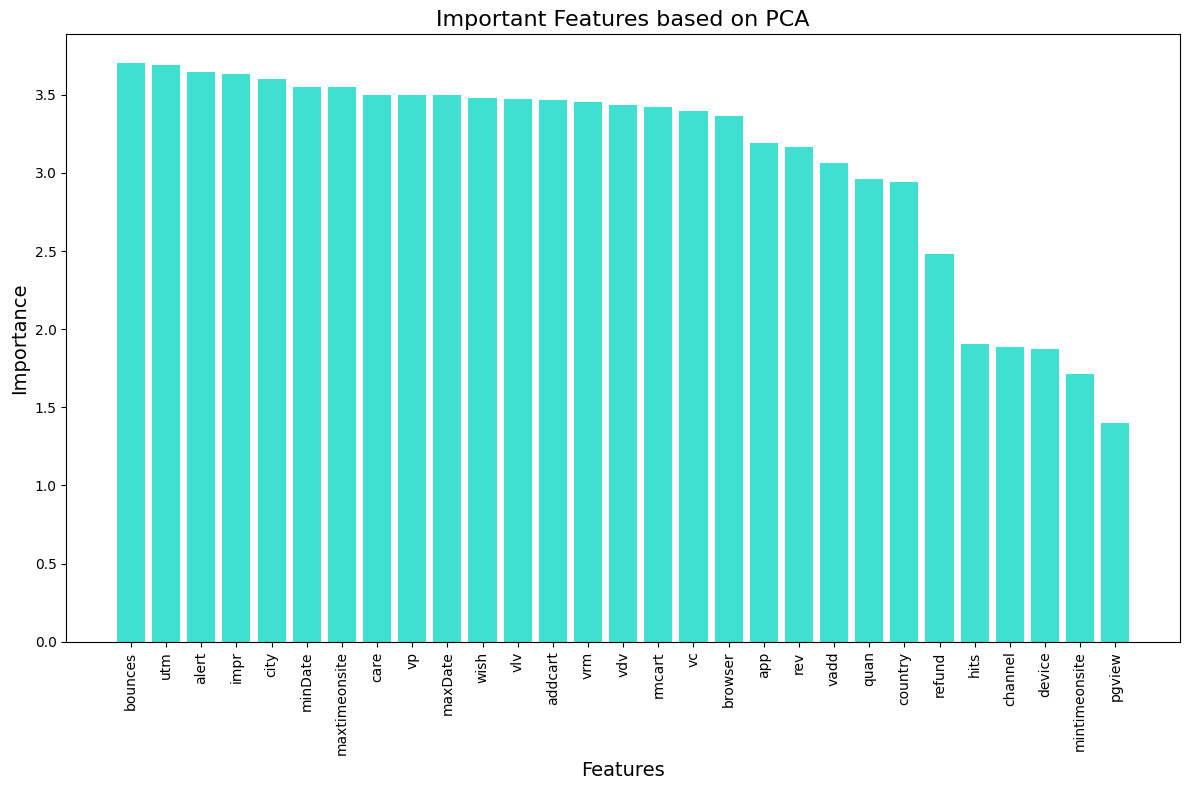

In [19]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 2: Loading Data
# Load your data into df_ml. For example:
# df_ml = pd.read_csv('your_data_file.csv')

# For the purpose of this example, I'll create a sample DataFrame
# Replace this with your actual data loading code

df_ml = pd.DataFrame(df_pre.copy()) # Copying the dataframe to a new variable to avoid any changes to the original dataframe

# Step 3: Data Preparation
# Drop the 'customerId' column if it exists
if 'customerId' in df_ml.columns:
    df_ml = df_ml.drop(columns=['customerId'])

# Identify datetime columns
datetime_columns = df_ml.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical format (Unix timestamp)
for col in datetime_columns:
    df_ml[col] = df_ml[col].apply(lambda x: x.timestamp())

# Handle missing values using SimpleImputer (e.g., fill missing values with the mean of the column)
imputer = SimpleImputer(strategy='mean')
if df_ml.isnull().any().any():
    df_ml_imputed = imputer.fit_transform(df_ml)
else:
    df_ml_imputed = df_ml

# Step 4: Standardizing the Features
scaler = StandardScaler()
df_ml_scaled = scaler.fit_transform(df_ml_imputed)

# Step 5: Applying PCA
pca = PCA()
df_ml_pca = pca.fit_transform(df_ml_scaled)

# Extract the principal components and calculate their absolute sum
principal_components = pca.components_
abs_sum_components = np.abs(principal_components).sum(axis=0)

# Sort features by importance
important_feature_indices = np.argsort(abs_sum_components)[::-1]
important_features = df_ml.columns[important_feature_indices]

# Step 6: Visualizing the Results
plt.figure(figsize=(12, 8))

# Use a different color (e.g., "turquoise") for the bars
plt.bar(range(len(important_features)), abs_sum_components[important_feature_indices], color='turquoise', align='center')

# Customize the plot
plt.xticks(range(len(important_features)), important_features, rotation=90)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Important Features based on PCA', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()



In [29]:
df_ml.head()

,customerId,minDate,maxDate,country,city,browser,device,app,utm,channel,pgview,mintimeonsite,maxtimeonsite,bounces,hits,impr,wish,care,alert,addcart,rmcart,refund,vadd,vrm,vp,vc,vdv,vlv,quan,rev,freq,rec,target_churn,yearstart,monthstart,yearend,monthend
0,+++GRcoGtSSd6mS7WsDXDQ==,2020-12-13,2020-12-13,None,None,None,None,None,None,None,5.000000,91.0,479.0,NaN,1.000000,23.500000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,NaN,2,460,1,2020,12,2020,12
1,+++SJgx/2IJ+dXq7vF8COg==,2021-11-28,2021-11-28,None,None,None,None,None,None,None,4.000000,1710.0,1710.0,NaN,7.000000,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,14.0,41.94,1,110,1,2021,11,2021,11
2,+++aKiAiXhTfaqCLC/kyWA==,2021-03-16,2021-03-16,None,None,None,None,None,None,None,24.000000,1109.0,1109.0,NaN,18.000000,380.000000,0,0,0,4,0,0,1,0,1,1,1,1,8.0,40.29,1,367,1,2021,3,2021,3
3,+++rPSJqJxUybd5VQBJlRw==,2020-05-28,2020-05-29,None,None,None,None,None,None,None,12.666667,157.0,2634.0,NaN,1.333333,15.333333,0,0,0,2,0,0,1,0,0,1,1,0,0.0,NaN,6,658,1,2020,5,2020,5
4,+++tkVCLHtuRHFq/0FGt9A==,2020-11-30,2020-11-30,None,None,None,None,None,None,None,2.000000,1124.0,1124.0,NaN,13.500000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,18.0,31.11,2,473,1,2020,11,2020,11


In [38]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530304 entries, 0 to 1530303
Data columns (total 37 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   customerId     1530304 non-null  object        
 1   minDate        1530304 non-null  datetime64[ns]
 2   maxDate        1530304 non-null  datetime64[ns]
 3   country        0 non-null        object        
 4   city           0 non-null        object        
 5   browser        0 non-null        object        
 6   device         0 non-null        object        
 7   app            0 non-null        object        
 8   utm            0 non-null        object        
 9   channel        0 non-null        object        
 10  pgview         1519993 non-null  float64       
 11  mintimeonsite  1504917 non-null  float64       
 12  maxtimeonsite  1504917 non-null  float64       
 13  bounces        457757 non-null   float64       
 14  hits           1530304 non-null  f

In [60]:
df_ml.head()

,customerId,country,city,browser,device,app,utm,channel,pgview,mintimeonsite,maxtimeonsite,bounces,hits,impr,wish,care,alert,addcart,rmcart,refund,vadd,vrm,vp,vc,vdv,vlv,quan,rev,freq,rec,target_churn,yearstart,monthstart,yearend,monthend,days_since_minDate,days_since_maxDate
0,+++GRcoGtSSd6mS7WsDXDQ==,None,None,None,None,None,None,None,5.000000,91.0,479.0,NaN,1.000000,23.500000,0,0,0,0,0,0,0,0,0,0,1,1,0.0,NaN,2,460,1,2020,12,2020,12,1266,1266
1,+++SJgx/2IJ+dXq7vF8COg==,None,None,None,None,None,None,None,4.000000,1710.0,1710.0,NaN,7.000000,0.000000,0,0,0,0,0,0,0,0,1,1,1,0,14.0,41.94,1,110,1,2021,11,2021,11,916,916
2,+++aKiAiXhTfaqCLC/kyWA==,None,None,None,None,None,None,None,24.000000,1109.0,1109.0,NaN,18.000000,380.000000,0,0,0,4,0,0,1,0,1,1,1,1,8.0,40.29,1,367,1,2021,3,2021,3,1173,1173
3,+++rPSJqJxUybd5VQBJlRw==,None,None,None,None,None,None,None,12.666667,157.0,2634.0,NaN,1.333333,15.333333,0,0,0,2,0,0,1,0,0,1,1,0,0.0,NaN,6,658,1,2020,5,2020,5,1465,1464
4,+++tkVCLHtuRHFq/0FGt9A==,None,None,None,None,None,None,None,2.000000,1124.0,1124.0,NaN,13.500000,0.000000,0,0,0,0,0,0,0,0,1,1,0,0,18.0,31.11,2,473,1,2020,11,2020,11,1279,1279


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import pickle
df_ml=df_pre.copy()
# Define the features and target variable
# Drop specified columns
columns_to_drop = [ "app", "yearend", "device", "vc", "bounces", "wish", "care", "alert", "vp"]
features = df_ml.drop(columns_to_drop, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Print ROC AUC
print('ROC AUC:', roc_auc)

# Save the model as a pickle file
pickle.dump(model, open('churn_model.pkl', 'wb'))


ValueError: could not convert string to float: 'KDk1QiXVL9nP0W01WOGWmw=='